In [19]:
import sqlite3
import time
import datetime
import random
from matplotlib import pyplot as plt
from datetime import datetime

In [6]:
conn = sqlite3.connect('mqtt.sqlite3')
c = conn.cursor()
print(c)

In [14]:
def read_from_db():
    #c.execute('SELECT * FROM sensors_data')
    c.execute('SELECT temp, hum, soil, lum_1, lum_2, created_at FROM sensors_data')
    data = c.fetchall()
    
    temp = []
    hum = []
    soil = []
    lum1 = []
    lum2 = []
    ts = []
    
    #print(data)
    for row in data:
        #print(row)
        temp.append(row[0])
        hum.append(row[1])
        soil.append(row[2])
        lum1.append(row[3])
        lum2.append(row[4])
        ts.append(row[5])
    
    return temp, hum, soil, lum1, lum2, ts

In [15]:
temp, hum, soil, lum1, lum2, ts = read_from_db()

In [27]:
print(len(temp))
dt = datetime.fromtimestamp(ts[0])
print(dt)
print(dt.strftime("%H:%M"))

2251
2022-04-26 18:01:16
18:01


In [40]:
def plot_lum(step=5):

    lum1_min = lum1[::step]
    lum2_min = lum2[::step]

    ts_min = ts[::step]
    ts_min = [datetime.fromtimestamp(elem).strftime("%H:%M") for elem in ts_min]
    #ts_min = list(map(datetime.fromtimestamp(elem).strftime("%H:%M"), ts_min ))

    plt.figure(figsize=(12, 8))
    plt.grid(True)
    #plt.plot(ts[::30], lum1[::30])
    plt.plot(ts_min, lum1_min)
    plt.plot(ts_min, lum2_min)

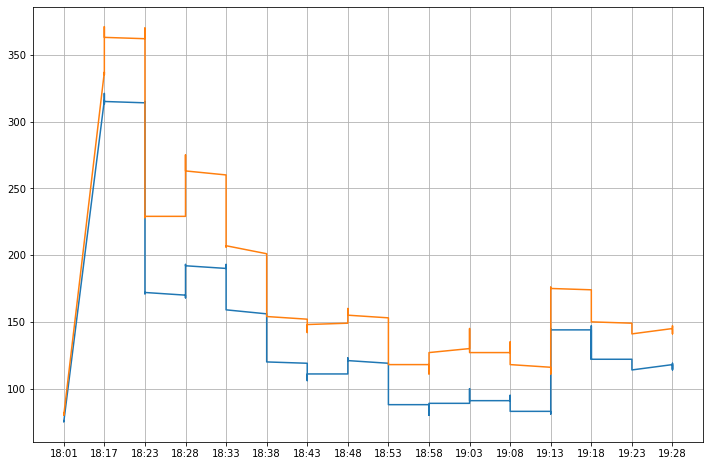

In [41]:
plot_lum()

In [50]:
def plot_temp_hum(step=5):

    temp_min = temp[::step]
    hum_min = hum[::step]

    ts_min = ts[::step]
    ts_min = [datetime.fromtimestamp(elem).strftime("%H:%M") for elem in ts_min]
    #ts_min = list(map(datetime.fromtimestamp(elem).strftime("%H:%M"), ts_min ))

    plt.figure(figsize=(12, 8))
    plt.grid(True)
    #plt.plot(ts[::30], lum1[::30])
    plt.plot(ts_min, temp_min, label='temp')
    plt.plot(ts_min, hum_min, label='hum')
    plt.legend()

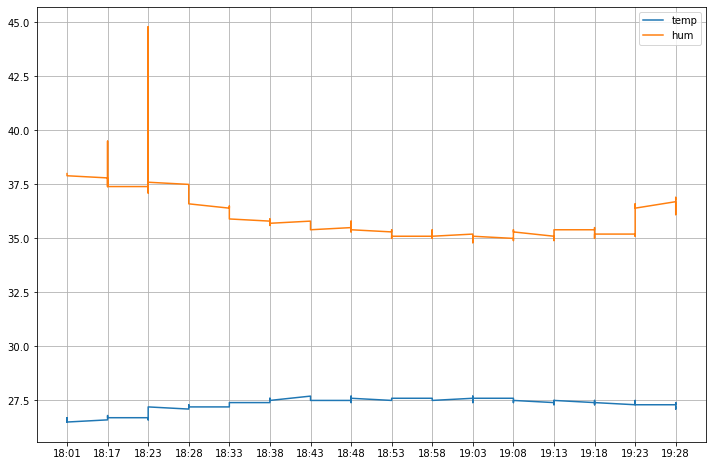

In [51]:
plot_temp_hum()

In [59]:
def plot_soil(step=1):
    soil_min = soil[::step]

    ts_min = ts[::step]
    ts_min = [datetime.fromtimestamp(elem).strftime("%H:%M") for elem in ts_min]
    #ts_min = list(map(datetime.fromtimestamp(elem).strftime("%H:%M"), ts_min ))

    plt.figure(figsize=(12, 8))
    plt.grid(True)
    #plt.plot(ts[::30], lum1[::30])
    plt.plot(ts_min, soil_min, label='Soil')
    #plt.scatter(ts_min, soil_min, label='Soil')
    plt.legend()

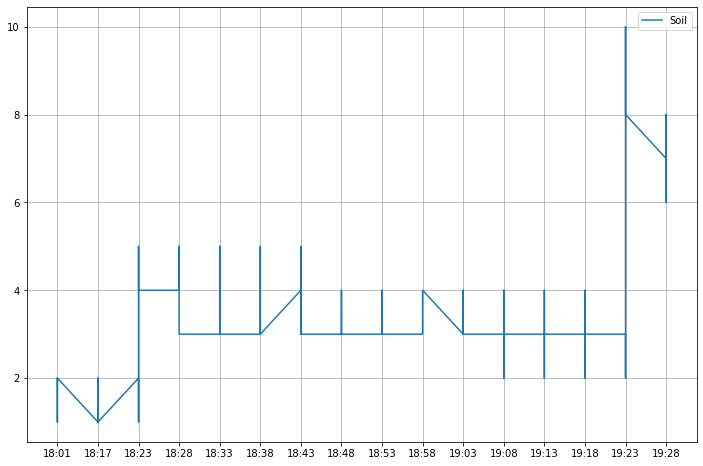

In [60]:
plot_soil()